## 📘 RNA cleavage simulation

**Last updated:** 2025-10-08

## General information

- This notebook is organized in sections so you can **show/hide** blocks as needed.
- Code cells are **kept minimal**. Parameters and context live in Markdown.
- Run cells **top → bottom**. If you change a parameter, re-run the affected section.

⚠️ **Temporary session.** Work in Binder is not saved after you close the tab.  
✅ **Save your results** to your own storage (download files or copy text) before leaving.

## ⚙️ Definitions

The following cells contain definitions for code elements that will be used, but should usually not change.  
Since they are at the top, they will run first when clicking on ⏩**Restart & Run All**, ensuring that the code has everything it needs.

If you want to modify how the simulation happens or introduce new enzymes, this is where the modifications will happen.

In [1]:
# import necessary packages

import matplotlib.pyplot as plt

In [2]:
# define functions used in the notebook

def load_clean_sequence(file_path: str) -> str:
    with open(file_path, 'r') as file:
        sequence = file.read().strip()
    return sequence

def digestion_enzyme(sequence: str, cleaving_enzyme: callable, missed_cleavages: int=0) -> list:
    oligo = set()
    cut_sites = [0]
    
    for i in range(0, len(sequence)-2):
        if cleaving_enzyme(sequence[i], sequence[i+1]):
            cut_sites.append(i+1)
    
    cut_sites.append(len(sequence))

    if len(cut_sites) > 2 and missed_cleavages in [0, 1, 2]:
        if  missed_cleavages == 0:
            for j in range(0,len(cut_sites)-1):
                oligo.add(sequence[cut_sites[j]:cut_sites[j+1]])

        elif missed_cleavages == 1:
            for j in range(0,len(cut_sites)-2):
                oligo.add(sequence[cut_sites[j]:cut_sites[j+1]])
                oligo.add(sequence[cut_sites[j]:cut_sites[j+2]])
            
            oligo.add(sequence[cut_sites[-2]:cut_sites[-1]])

        elif missed_cleavages == 2:
            for j in range(0,len(cut_sites)-3):
                oligo.add(sequence[cut_sites[j]:cut_sites[j+1]])
                oligo.add(sequence[cut_sites[j]:cut_sites[j+2]])
                oligo.add(sequence[cut_sites[j]:cut_sites[j+3]])
            
            oligo.add(sequence[cut_sites[-3]:cut_sites[-2]])
            oligo.add(sequence[cut_sites[-3]:cut_sites[-1]])
            oligo.add(sequence[cut_sites[-2]:cut_sites[-1]])
    else:
        oligo.add(sequence)
    
    oligo_list = list(oligo)
    oligo_list.sort(key=len)

    return oligo_list

def get_length_map(oligo_list: list) -> dict:
    length_map = {}
    for oligo in oligo_list:
        length = len(oligo)
        if length in length_map:
            length_map[length] += 1
        else:
            length_map[length] = 1
    return length_map


In [3]:
# Define RNases as cleaving functions

rnases = {}

rnases["demo"] = lambda c, n: c == "A" and n in ["G", "U"]  # demo RNase that cleaves after A if followed by U or G
rnases["RNAse T1"] = lambda c, n: c == "G" and n in ["A", "C", "G", "U"] # RNase T1 cleaves after G
rnases["RNAse 4"] = lambda c, n: c == "U" and n in ["A", "G"] # RNase 4 cleaves after U if followed by A or G 
rnases["RNAse MC1"] = lambda c, n: c in ["A", "C", "U"] and n == "U" # RNase MC1 cleaves after A, C, or U if followed by U  
rnases["Cusativin"] = lambda c, n: (c == "C" and n in ["A", "G", "U"]) or (c =="U" and n == "A") or (c in ["A", "U"] and n == "U") # Cusativin cleaves after C if followed by A, G, or U; after U if followed by A; after A or U if followed by U

## 🚀 Main code

The main execution cells are below.  
After changing any parameters above, **re-run this section** so the changes take effect.

In [4]:
# This is the main workflow


# if you want to directly input a sequence, you can do it like this:
# seq = "AUGCUAGCUAGCUAGCUAGC"
# or load from a file like this (ensure the file contains only the sequence on a single line):
# seq = load_clean_sequence('path/to/your/sequence.txt')
seq = load_clean_sequence('example-sequence.txt')


# Choose the enzyme to simulate - You can see the available enzymes in the `rnases` dictionary defined above
enzyme = "Cusativin"


# Simulate digestion, get fragments sorted by length, and get length map
oligo_list = digestion_enzyme(seq, rnases[enzyme])
length_map = get_length_map(oligo_list)


# Display results for rapid inspection
print(oligo_list)
print(length_map)

['GC', 'AC', 'GGC', 'ATC', 'GCC', 'AGC', 'GTC', 'AAC', 'GAC', 'AAAC', 'GAAC', 'AGAC', 'GATC', 'ACTC', 'AAGC', 'AATC', 'ATTC', 'AGGC', 'GGAC', 'AACC', 'GGTC', 'AAAAC', 'GAATC', 'AATAC', 'GCTAC', 'GTTCC', 'AGACC', 'ATGAC', 'AAGTC', 'AAGAC', 'AACTC', 'AAACC', 'AAATC', 'AGTGC', 'GTCTC', 'GATTC', 'AATCC', 'GACTC', 'AGCTC', 'AAGGC', 'AAAGC', 'GTGGC', 'ATCTGC', 'GTTGAC', 'AGTATC', 'GAGAGC', 'GTCTAC', 'ATGCCC', 'ATGAAC', 'ATTGGC', 'GTAAAC', 'AAATTC', 'GTGAAC', 'AATTGC', 'ATAAGC', 'AGCTTC', 'ACTTGC', 'GTGGTC', 'GGAAGC', 'AAAAAC', 'ATAAGCC', 'ATGCCCC', 'AGCTTTC', 'ACTAAGC', 'ATTGCTC', 'GTTTTGC', 'AACTTCC', 'ATGTGGC', 'ATATAAC', 'AGATGCC', 'GGATAAC', 'AAAAAGC', 'AAGAAGC', 'AATTACC', 'ATATTGC', 'GATGAAC', 'ATGATGC', 'GTTAAGC', 'AATAGAC', 'AAAGGTC', 'GGTGATC', 'GAAAACC', 'GATATAC', 'AAATAGC', 'AAAAAAC', 'AATAGTC', 'GGATTTGC', 'ATAGAGAC', 'AATCTGGC', 'GGATGGGC', 'GGATATGC', 'AGAAGTAC', 'AAACCTAC', 'AATTGATC', 'AGCTCCCC', 'GAATTGAC', 'ATTGTTCC', 'AAGGAGTC', 'ATATGCTC', 'AGGTGAAC', 'AAGAAAAC', 'GTTTGT

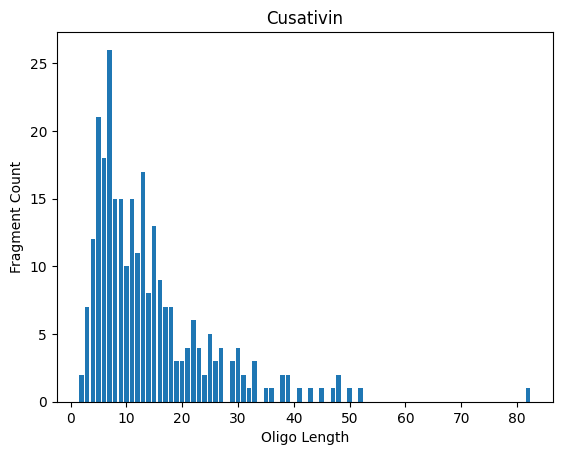

In [5]:
(x, y) = zip(*sorted(length_map.items(), key=lambda item: item[0]))
plt.bar(x, y)
plt.xlabel('Oligo Length')
plt.ylabel('Fragment Count')
plt.title(enzyme)
plt.show()

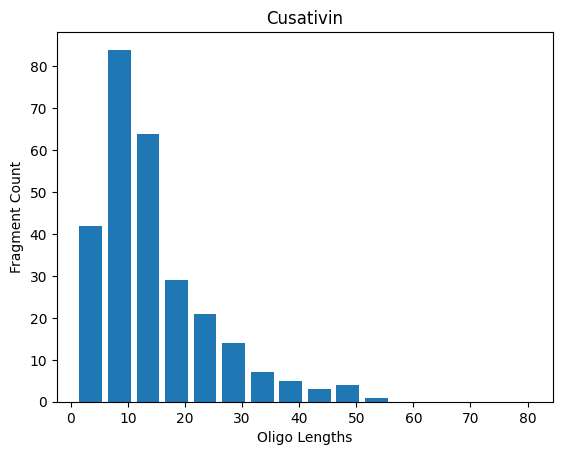

In [6]:
bins = range(1, max(length_map.keys()), 5)  # Create bins grouping lengths by 5
plt.hist([len(o) for o in oligo_list], bins=bins, align='mid', rwidth=0.8)
plt.xlabel('Oligo Lengths')
plt.ylabel('Fragment Count')
plt.title(enzyme)
plt.show()

## 💾 Exporting results

- The fragment list is exported as plain text. You can **copy–paste into Excel**.  
- If you need CSV/Excel/FASTA exports, they can be added later.

In [7]:
with open("output.txt", mode="w") as file:
    file.write("\n".join(oligo_list) + "\n")